In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

%matplotlib inline

C:\Users\vishal.kumar1\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\vishal.kumar1\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\vishal.kumar1\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
iris=load_iris()

In [3]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [6]:
df_iris=pd.DataFrame(iris.data,columns=iris.feature_names)

In [7]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Since we will be working on petal length and petal width only hence we will be dropping the other vaiables

In [9]:
df_iris.drop(['sepal length (cm)','sepal width (cm)'],axis=1,inplace=True)

In [10]:
df_iris.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


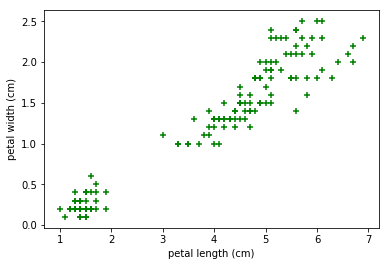

In [12]:
plt.scatter(df_iris['petal length (cm)'],df_iris['petal width (cm)'],c='green',marker='+')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

From the above scatter plot we can clearly identify 2 clusters.
However we will implement the SSE and Elbow method and would find the value for K

In [20]:
k=range(1,11)
sse=[]

for i in k:
    km=KMeans(n_clusters=i)
    km.fit(df_iris[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

In [21]:
sse

[550.8953333333334,
 86.39021984551397,
 31.371358974358973,
 19.48300089968511,
 13.916908757908757,
 11.03633387775173,
 9.215301022648848,
 7.621496965452848,
 6.456494541406307,
 5.528148730354612]

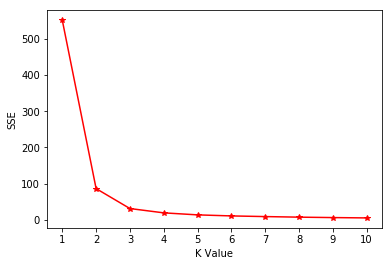

In [22]:
plt.plot(k,sse,c='red',marker='*')
plt.xlabel('K Value')
plt.ylabel('SSE')
plt.xticks(k)
plt.show()

From the above plot we can see that 2 should be the optimum value of K i.e., n_clusters in KMeans algo

Now we will apply the KMeans algo using K=2

In [25]:
km=KMeans(n_clusters=2)
y_predicted=km.fit_predict(df_iris[['petal length (cm)','petal width (cm)']])

In [30]:
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
df_iris['Cluster']=y_predicted

In [27]:
df_iris.head()

,petal length (cm),petal width (cm),Cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [28]:
df_iris['Traget']=iris.target

In [29]:
df_iris.head()

,petal length (cm),petal width (cm),Cluster,Traget
0,1.4,0.2,1,0
1,1.4,0.2,1,0
2,1.3,0.2,1,0
3,1.5,0.2,1,0
4,1.4,0.2,1,0


In [32]:
df_cluster0=df_iris[df_iris['Cluster']==0]
df_cluster1=df_iris[df_iris['Cluster']==1]

In [33]:
df_cluster0.head()

,petal length (cm),petal width (cm),Cluster,Traget
50,4.7,1.4,0,1
51,4.5,1.5,0,1
52,4.9,1.5,0,1
53,4.0,1.3,0,1
54,4.6,1.5,0,1


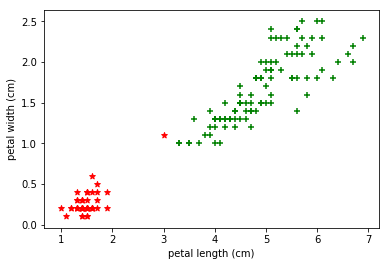

In [34]:
plt.scatter(df_cluster0['petal length (cm)'],df_cluster0['petal width (cm)'],c='green',marker='+')
plt.scatter(df_cluster1['petal length (cm)'],df_cluster1['petal width (cm)'],c='red',marker='*')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

In the above plot one red point is away from its cluster. Hence we will use the data preprocessing and will see if it makes any impact on it

In [35]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

In [36]:
df_iris_scaled=df_iris.copy()

In [37]:
df_iris_scaled.head()

,petal length (cm),petal width (cm),Cluster,Traget
0,1.4,0.2,1,0
1,1.4,0.2,1,0
2,1.3,0.2,1,0
3,1.5,0.2,1,0
4,1.4,0.2,1,0


In [39]:
df_iris_scaled['petal length (cm)']=scalar.fit_transform(df_iris_scaled[['petal length (cm)']])
df_iris_scaled['petal width (cm)']=scalar.fit_transform(df_iris_scaled[['petal width (cm)']])

In [40]:
df_iris_scaled.head()

,petal length (cm),petal width (cm),Cluster,Traget
0,0.067797,0.041667,1,0
1,0.067797,0.041667,1,0
2,0.050847,0.041667,1,0
3,0.084746,0.041667,1,0
4,0.067797,0.041667,1,0


In [43]:
df_iris_scaled.drop(columns=['Cluster'],axis=1,inplace=True)

In [42]:
KM=KMeans(n_clusters=2)

In [45]:
y_predicted1=KM.fit_predict(df_iris_scaled[['petal length (cm)','petal width (cm)']])
df_iris_scaled['Cluster']=y_predicted1

In [46]:
df0=df_iris_scaled[df_iris_scaled['Cluster']==0]
df1=df_iris_scaled[df_iris_scaled['Cluster']==1]

In [48]:
KM.cluster_centers_

array([[0.6620339 , 0.65666667],
       [0.07830508, 0.06083333]])

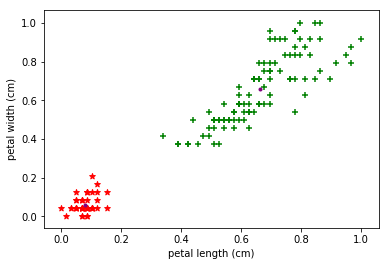

In [51]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],c='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],c='red',marker='*')
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],c='purple',marker='.')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

After scaling the data we can the the cluster is formed properly and no mismatch is there.